In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('apple_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [3]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,24.288580,24.757334,23.848706,24.746226,212818400
2015-01-05,23.604326,24.137507,23.417714,24.057530,257142000
2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400
2015-01-07,23.937576,24.037547,23.704309,23.815388,160423600
2015-01-08,24.857306,24.915067,24.148620,24.266365,237458000


In [4]:
data = df[['Close']].values

Applying normalization on Close

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data_scaled = sc.fit_transform(data)
print(data_scaled)

[[0.01531502]
 [0.01243697]
 [0.01244633]
 ...
 [1.        ]
 [0.98560779]
 [0.97138334]]


In [6]:
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i])
        y.append(data[i])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(data_scaled, time_step)

# Reshaping LSTM
X.shape, y.shape

((2455, 60, 1), (2455, 1))

In [7]:
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20


C:\Users\AYUSH JHA\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0164
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.1445e-04
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.8152e-04
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.7550e-04
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.5600e-04
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.0051e-04
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.4767e-04
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.5820e-04
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.4503e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.7337e-04
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.0892e-04
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.9340e-04
Epoch 13/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.0436e-04
Epoch 14/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.3473e-04
Epoch 15/20
62/62 ━━━━━━━━━━━━

In [10]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = sc.inverse_transform(train_predict)
y_train_actual = sc.inverse_transform(y_train)

test_predict = sc.inverse_transform(test_predict)
y_test_actual = sc.inverse_transform(y_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step  
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


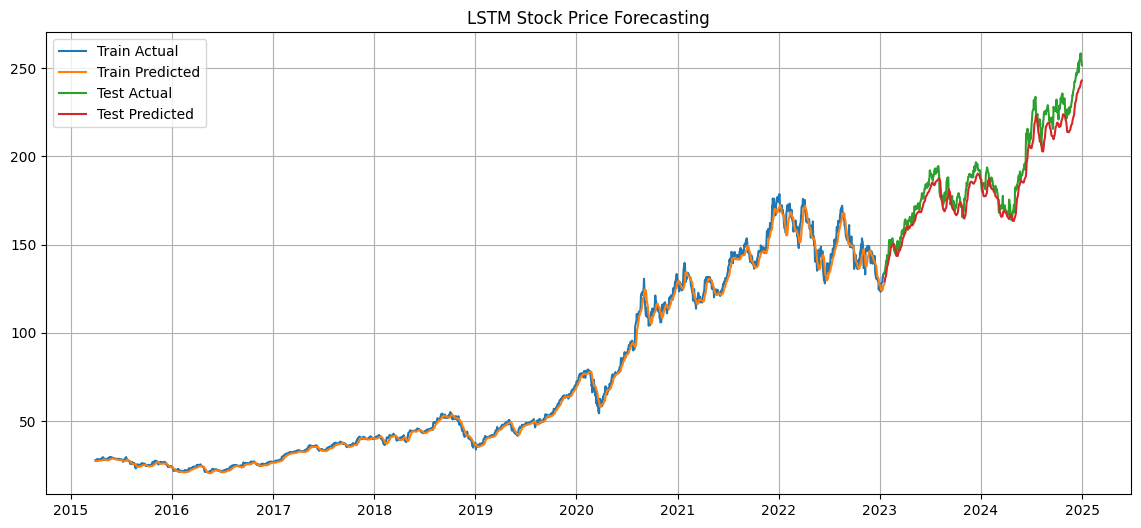

In [11]:
plt.figure(figsize=(14, 6))
plt.plot(df.index[time_step:split+time_step], y_train_actual, label='Train Actual')
plt.plot(df.index[time_step:split+time_step], train_predict, label='Train Predicted')
plt.plot(df.index[split+time_step:], y_test_actual, label='Test Actual')
plt.plot(df.index[split+time_step:], test_predict, label='Test Predicted')
plt.legend()
plt.title('LSTM Stock Price Forecasting')
plt.grid(True)
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error

mse_lstm = mean_squared_error(y_test_actual, test_predict)
print(f"LSTM MSE: {mse_lstm:.2f}")

LSTM MSE: 61.25
